In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [2]:
life=pd.read_csv("Life Expectancy Data.csv")
life.columns=['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', ' BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria','HIV/AIDS', 'GDP', 'Population',
       'Thinness  1-19 years', 'Thinness 5-9 years',
       'Income composition of resources', 'Schooling']
life

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:


def LinearMiniBatchDescent(x,y,Constants,learningRate,batch_size,Lambda):
    X_train,X_valid,y_train,y_valid=train_test_split(x, y, test_size=0.1, random_state=42)
    size=batch_size
    out=y_train.values
    validationMSE=0
    length=len(X.columns)
    delta=np.zeros(length+1)
    iterations=0
    indice=0
    currentMSE=0
    trainingMSEs=[]
    validationMSEs=[]
    All_Delta=[]
    All_Constants=[]
    All_lr=[]
    validationMSEs.append(LinearPrediction(X_valid,y_valid,Constants,Lambda))
    previousMSE=np.inf
    while previousMSE-currentMSE>=0.09 or iterations<5:
        slopes=Constants[:length]
        c=Constants[length]
        Ypred=X_train.apply(lambda x: np.sum(np.multiply(x,slopes))+c,axis=1)
        diff=np.subtract(Ypred,out).tolist()
        diff=np.asarray(diff)
        trainingMSE=(diff**2).sum()/size
        trainingMSEs.append(trainingMSE)
        batch_indices = (np.arange(indice, indice + batch_size)) % X_train.shape[0]
        batch_indices = batch_indices.astype(int)
        X_batch = X_train.iloc[batch_indices]
        y_batch = out[batch_indices]
        diff_batch=diff[batch_indices]
        delta[:length]=(2*(np.dot(X_batch.T, diff_batch))/batch_size).tolist()
        delta[:length] = list(np.array(delta[:length]) + 2 * Lambda * np.array(delta[:length]))
        delta[length]=((2*(diff_batch)).sum())/size
        All_Delta.append(delta.copy())
        prevConstants=Constants
        Constants=Constants-delta*learningRate
        All_Constants.append(Constants.copy())

        validationMSE=LinearPrediction(X_valid,y_valid,Constants,Lambda)
        iterations+=1
        indice=indice+batch_size
        validationMSEs.append(validationMSE)
        if iterations<5:
            pass
        else:
            LatestFiveMSEs=validationMSEs[iterations-5:iterations]
            previousMSE=max(LatestFiveMSEs)
            currentMSE=min(LatestFiveMSEs)
            previd=''
            currentid=''
            for i in range(len(LatestFiveMSEs)):
                if LatestFiveMSEs[i]==currentMSE:
                    currentid=i-1
                elif LatestFiveMSEs[i]==previousMSE:
                    previd=i-1
            print("The iteration "+str(iterations))
            num=np.linalg.norm(np.array(All_Delta[currentid]) - np.array(All_Delta[previd]))
            den=np.linalg.norm(np.array(All_Constants[currentid]) - np.array(All_Constants[previd]))
            L=num/den
            print("The Lipsthiz factor is "+str(L))
            learningRate = min(learningRate,1/L)
            print("The learning rate is "+str(learningRate))
        All_lr.append(learningRate)
    return trainingMSEs,validationMSEs,prevConstants,iterations,All_lr,All_Constants

def LinearPrediction(X,y,Constants,Lambda):
    out=y.values
    length=len(X.columns)
    slopes=Constants[:length]
    c=Constants[length]
    size=X.shape[0]
    Ypred=X.apply(lambda x: np.sum(np.multiply(x,slopes))+c,axis=1)
    MSE=(((Ypred-out)**2).sum()+Lambda*(np.sum(np.square(Constants))))/size
    return MSE

In [4]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imputedData=imp_median.fit_transform(life[['Life Expectancy','Alcohol','Hepatitis B','Polio','Diphtheria']])
life[['Life Expectancy','Alcohol','Hepatitis B','Polio','Diphtheria']]=imputedData
print(life.isna().sum())

Country                              0
Year                                 0
Status                               0
Life Expectancy                      0
Adult Mortality                     10
Infant Deaths                        0
Alcohol                              0
Percentage Expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                34
Under-Five Deaths                    0
Polio                                0
Total Expenditure                  226
Diphtheria                           0
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness  1-19 years                34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [5]:
scaler = StandardScaler()
X=life[['Alcohol', 'Hepatitis B','Measles','Polio','Diphtheria', 'HIV/AIDS']]
X=pd.DataFrame(data=scaler.fit_transform(X),columns=X.columns)
y=life['Life Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# print(X_train.shape[0]*0.9)
length=len(X.columns)+1
# Constants=np.random.rand(length)
Constants=np.array([0.71412257, 0.95880379, 0.51390224, 0.93763644, 0.33583024,
       0.15607157, 0.74435779])
learningRate=float(input("Enter the learning Rate you intend to use "))
Lambda=float(input("Enter the degree of regularization "))
batch_size=float(input("Enter the batch_size "))
AlltrainMSE,AllvalidMSE,Constants,iterations,All_lr,All_weights=LinearMiniBatchDescent(X_train,y_train,Constants,learningRate,batch_size,Lambda)
testMSE=LinearPrediction(X_test,y_test,Constants,Lambda)
trainMSE=LinearPrediction(X_train,y_train,Constants,Lambda)
print("The trainiMSE is "+str(trainMSE)+" ,last validMSE was "+str(AllvalidMSE[-1])+" and the testMSE is "+str(testMSE))
print("The number of iterations required for convergence is "+str(iterations))
print("The constants to be used are "+ str(Constants))

Enter the learning Rate you intend to use 0.01
Enter the degree of regularization 0.1
Enter the batch_size 100
The iteration 5
The Lipsthiz factor is 41.51222188199685
The learning rate is 0.01
The iteration 6
The Lipsthiz factor is 23.508538616021468
The learning rate is 0.01
The iteration 7
The Lipsthiz factor is 10.410399314828332
The learning rate is 0.01
The iteration 8
The Lipsthiz factor is 7.847013724128281
The learning rate is 0.01
The iteration 9
The Lipsthiz factor is 8.983981555558524
The learning rate is 0.01
The iteration 10
The Lipsthiz factor is 5.607231333443114
The learning rate is 0.01
The iteration 11
The Lipsthiz factor is 5.662846281628598
The learning rate is 0.01
The iteration 12
The Lipsthiz factor is 3.559312884645111
The learning rate is 0.01
The iteration 13
The Lipsthiz factor is 3.8602220343310067
The learning rate is 0.01
The iteration 14
The Lipsthiz factor is 3.346501631170599
The learning rate is 0.01
The iteration 15
The Lipsthiz factor is 3.768273410

In [6]:
# Create a DataFrame
df = pd.DataFrame(All_weights, columns=['Alcohol', 'Hepatitis','Measles','Polio','Diphtheria', 'HIV/AIDS', 'Y-Intercept'])
df['Algo']=['Lip-Mini-Batch']*df.shape[0]
# Display the DataFrame
print(df)

      Alcohol  Hepatitis   Measles     Polio  Diphtheria  HIV/AIDS  \
0    0.794181   0.728074  0.538615  1.021175    0.277439  0.284705   
1    0.733339   0.740768  0.707495  0.738724    0.146124  0.182505   
2    0.800200   0.722783  0.758807  0.775298    0.227206 -0.059057   
3    0.910799   0.932397  0.585131  0.841939    0.267520 -0.051507   
4    1.021527   0.646416  0.605865  0.997164    0.316694 -0.151053   
..        ...        ...       ...       ...         ...       ...   
223  2.676628  -0.700896 -0.798054  1.502358    2.092450 -4.587418   
224  2.668967  -0.702378 -0.810622  1.536953    2.115034 -4.616162   
225  2.674448  -0.711089 -0.828008  1.546701    2.129347 -4.630614   
226  2.672476  -0.721838 -0.815359  1.549467    2.122447 -4.624667   
227  2.669889  -0.705192 -0.824779  1.553075    2.116781 -4.640981   

     Y-Intercept            Algo  
0       2.103379  Lip-Mini-Batch  
1       3.423056  Lip-Mini-Batch  
2       4.731315  Lip-Mini-Batch  
3       6.016097  L

In [7]:
df2=pd.read_csv('gradient.csv')
df_combined = pd.concat([df2, df], ignore_index=True)

df_combined.to_csv('gradient.csv', index=False)

In [8]:
df_combined

,Alcohol,Hepatitis,Measles,Polio,Diphtheria,HIV/AIDS,Y-Intercept,Algo
0,0.775971,0.966025,0.452974,1.015007,0.420986,0.032844,2.117346,Batch-Gradient
1,0.835276,0.970826,0.394649,1.087785,0.501400,-0.086629,3.462834,Batch-Gradient
2,0.892159,0.973380,0.338813,1.156221,0.577330,-0.202484,4.781373,Batch-Gradient
3,0.946737,0.973848,0.285358,1.220551,0.649024,-0.314852,6.073506,Batch-Gradient
4,0.999120,0.972382,0.234181,1.281002,0.716713,-0.423860,7.339762,Batch-Gradient
...,...,...,...,...,...,...,...,...
1116,2.676628,-0.700896,-0.798054,1.502358,2.092450,-4.587418,68.614259,Lip-Mini-Batch
1117,2.668967,-0.702378,-0.810622,1.536953,2.115034,-4.616162,68.611146,Lip-Mini-Batch
1118,2.674448,-0.711089,-0.828008,1.546701,2.129347,-4.630614,68.632043,Lip-Mini-Batch
1119,2.672476,-0.721838,-0.815359,1.549467,2.122447,-4.624667,68.652709,Lip-Mini-Batch


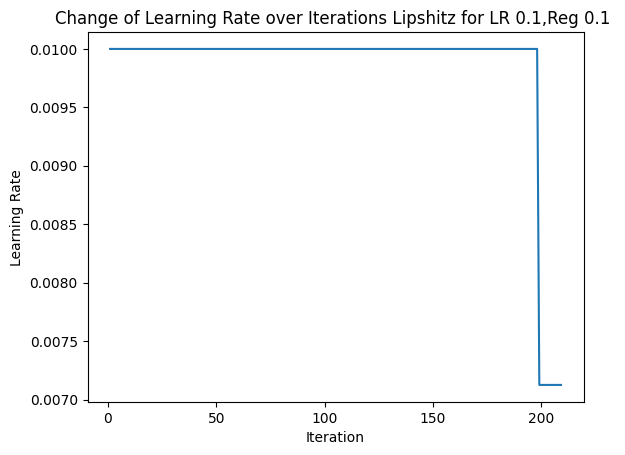

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, iterations + 1), All_lr)
plt.xlabel("Iteration")
plt.ylabel("Learning Rate")
plt.title("Change of Learning Rate over Iterations Lipshitz for LR 0.1,Reg 0.1 ")
plt.show()

In [ ]:
Ridge=Ridge(alpha=0.001,tol=0.001)
Ridge.fit(X_train,y_train)
Predictions=Ridge.predict(X_test)
ActualValues=y_test.values
MSE=(((Predictions-ActualValues)**2).sum()++Lambda*(np.sum(np.square(Constants))))/y_test.shape[0]
print("The MSE obtained after Linear Regression is "+str(MSE))
print("The coefficents are "+str(Ridge.coef_))
print("The intercept is "+str(Ridge.intercept_))